### 1. Import Needed Packages

In [76]:
import matplotlib.pyplot as plt     # displaying images and plots
import numpy as np                  # numerical computations (especially SVD)
from matplotlib.image import imread # read image from a file
from PIL import Image
import os

In [77]:
imagePath = 'images/house.jpg'
outputPath = 'output_gray'

### 2. Open image And Show

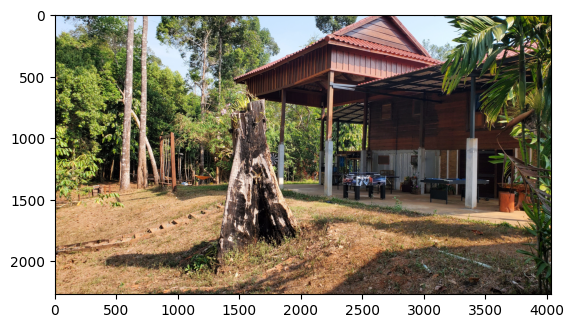

In [78]:
A = imread(imagePath)
imt = plt.imshow(A)


### 3. Convert image to gray

Shape of X (2268, 4032)


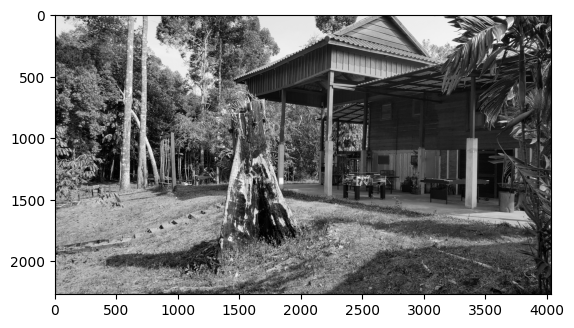

In [79]:
X = np.mean(A, -1); # Convert image to gray
img = plt.imshow(X, cmap='gray')
print("Shape of X", X.shape)
plt.imsave(f"{outputPath}/original.jpg", X, cmap='gray')

### 4. Computes the Singular Value Decomposition (SVD)

In [80]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

### 5. Using rank instead of full matrix

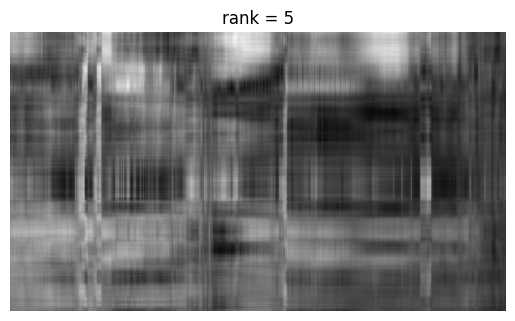

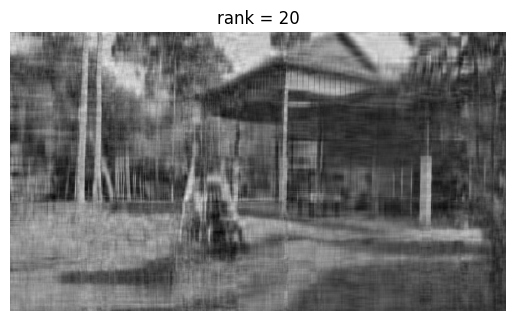

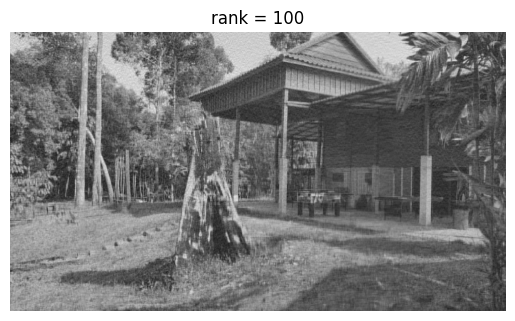

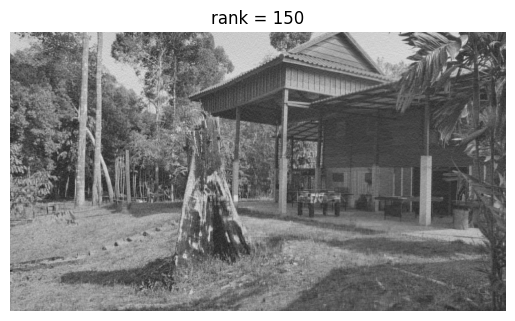

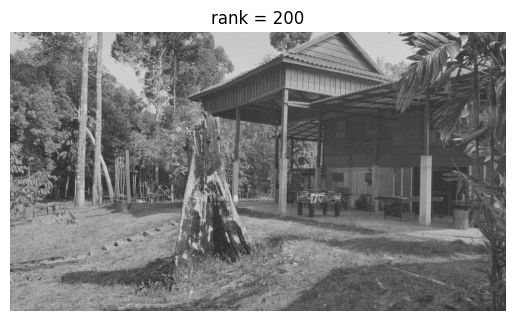

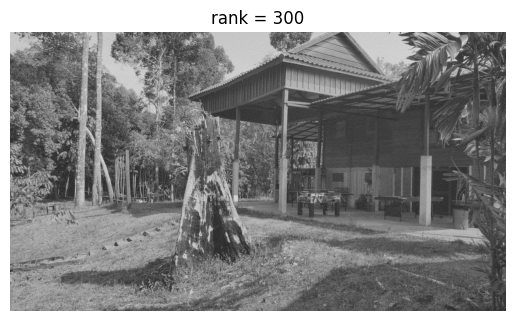

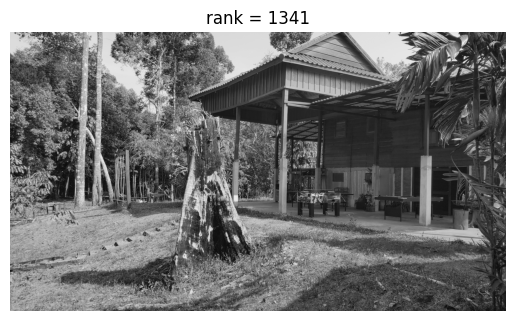

In [81]:
# 5
for r in (5, 20, 100, 150, 200, 300, 1341):
    X_compressed = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    img = plt.imshow(X_compressed, cmap='gray')
    plt.axis('off')
    plt.title("rank = " + str(r))
    plt.show()
    plt.imsave(f"{outputPath}/{r}_compressed.jpg", X_compressed, cmap='gray')

### 6. Files Size

In [82]:
images_dir_path = 'output_gray'
files_with_sizes = []

for file_name in os.listdir(images_dir_path):
    file_path = os.path.join(images_dir_path, file_name)
    
    file_size = os.stat(file_path).st_size  # Get file size in bytes
    files_with_sizes.append((file_name, file_size))

files_with_sizes.sort(key=lambda x: x[1], reverse=True)

for file_name, file_size in files_with_sizes:
    print(f'{file_name} : {round(file_size / 1000)} KB')

original.jpg : 2093 KB
1341_compressed.jpg : 1971 KB
300_compressed.jpg : 1582 KB
200_compressed.jpg : 1437 KB
150_compressed.jpg : 1343 KB
100_compressed.jpg : 1207 KB
20_compressed.jpg : 784 KB
5_compressed.jpg : 585 KB


### 7. Graph

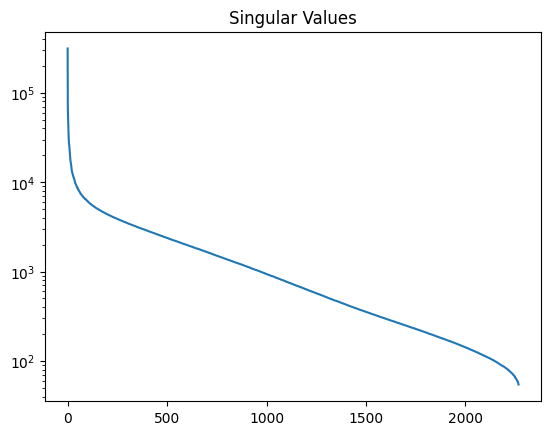

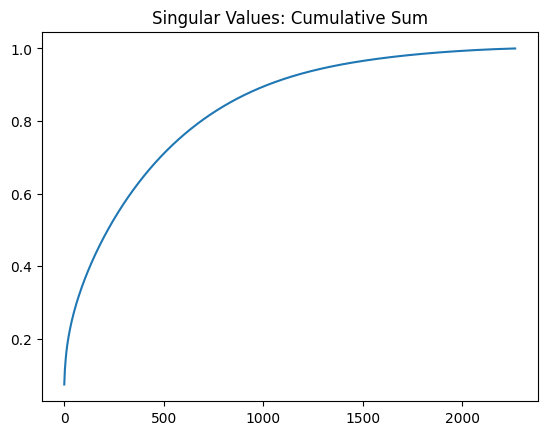

In [83]:

plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()
